# Преобразование Хафа

Задача состоит в обнаружении геометрических примитивов на изображении.

1. Обнаружения линий на изображении с помощью преобразования Хафа.
2. Обнаружения окружностей на изображении с помощью преобразования Хафа.




In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Обнаружение линий

Рассмотрим применение реализации преобразования Хафа из OpenCV – функция cv2.HoughLines(), синтаксис которой:

lines = cv2.HoughLines(image, rho, theta, threshhold)

*   image: Image src
*   rho: Distance resolution of the accumulator (distance from the coordinate origin in the hough space)
*   theta: Angle resolution of the accumulator (Line rotation in radians)
*   threshold: Accumulator threshold parameter (Lines are only selected if they get votes equal to the threshold value)



## Пример 1
Сначала рассмотрим очень простой вариант: на изображении присутствуют прямые горизонтальные и вертикальные линии, шум отсутствует.

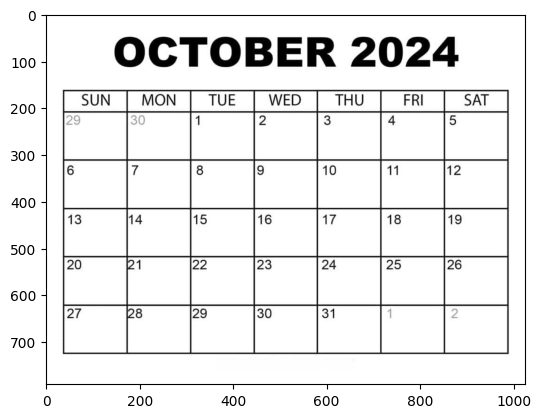

In [3]:
src = cv.imread("calendar-24-10.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
plt.imshow(src)

In [4]:
def drawLines(image, lines):
  if lines.shape[2] == 2 :
    for line in lines:
      rho, theta = line[0]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0+1000*(-b))
      y1 = int(y0+1000*(a))
      x2 = int(x0-1000*(-b))
      y2 = int(y0-1000*(a))
      cv.line(image,(x1,y1),(x2,y2),(255,0,0),2)
  else:
    for line in lines:
      x1,y1,x2,y2 = line[0]
      cv.line(image, (x1,y1), (x2,y2), (0,255,0), 2)

  plt.imshow(image)

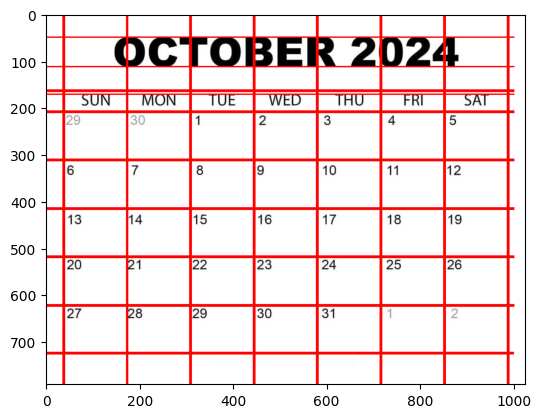

In [7]:
edges = cv.Canny(gray, 50, 150, apertureSize=3)
#plt.imshow(edges, 'gray')
lines = cv.HoughLines(edges, 1, np.pi/180, 200)
drawLines(src.copy(), lines)

В OpevCV реализовано также вероятностное преобразование Хафа (Probabilistic Hough Transform). Синтаксис функции:

lines = cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)

*   image: Image src rho: Distance resolution of the accumulator (distance from the coordinate origin in the hough space)
*   theta: Angle resolution of the accumulator (Line rotation in radians)
*   threshold: Accumulator threshold parameter (Lines are only selected if they get votes equal to the threshold value)
*   minLineLength: Line segments shorter than this value are rejected
*   maxLineGap: Max allowd gap between line segments to treat them as a single line

(32, 1, 4)


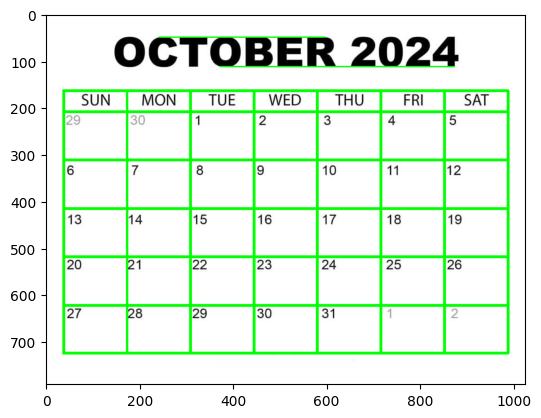

In [8]:
edges = cv.Canny(gray, 50, 150,apertureSize=3)
lines = cv.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=40)
print(lines.shape)

drawLines(src.copy(), lines)

# Пример 2

Рассмотрим вариант сложнее – линии ярко выраженные, но изображение получено с камеры телефона, присутствуют шумы на изображении.

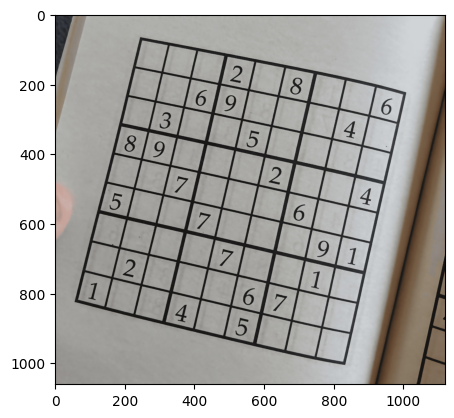

In [10]:
src = cv.imread("sudoku-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
plt.imshow(src)

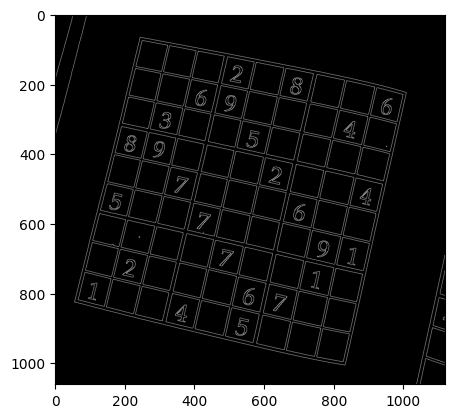

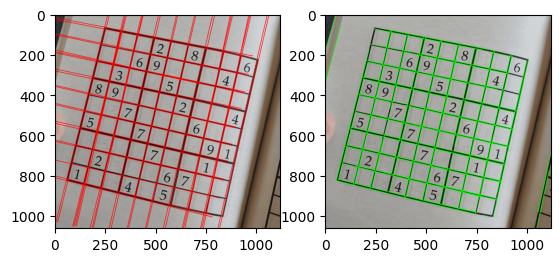

In [11]:
edges = cv.Canny(gray, 50, 200, apertureSize = 3)
plt.imshow(edges, 'gray')
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

fig, axs = plt.subplots(1,2)
plt.axes(axs[0])
drawLines(src.copy(), lines)

lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=40)
plt.axes(axs[1])
drawLines(src.copy(), lines)


# Пример 3
Обнаружение разметки на дороге.

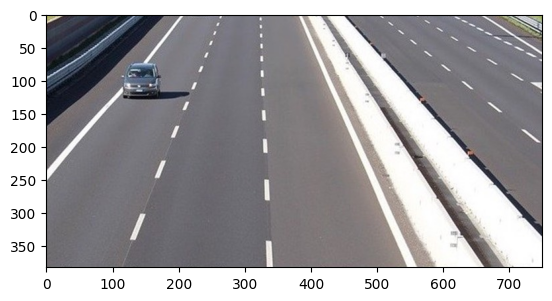

In [13]:
src = cv.imread("road.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

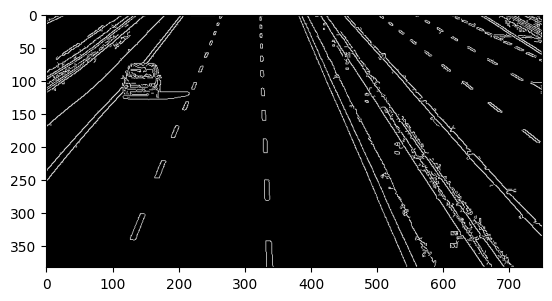

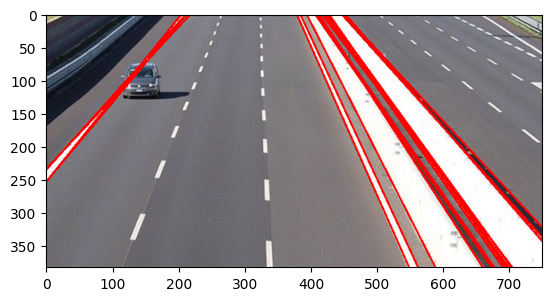

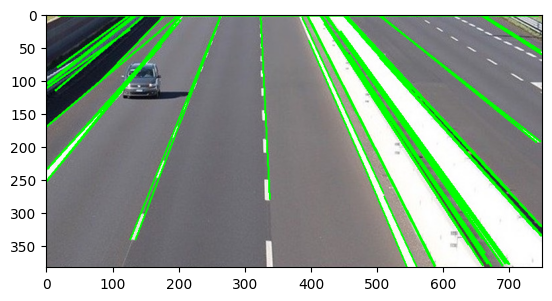

In [14]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

edges = cv.Canny(gray, 50, 200, apertureSize = 3)
plt.imshow(edges, 'gray')

lines = cv.HoughLines(edges, 1, np.pi/180, 150)
plt.figure()
drawLines(src.copy(), lines)

lines = cv.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=10, maxLineGap=350)
plt.figure()
drawLines(src.copy(), lines)

#2. Обнаружение окружностей

Для обнаружения окружностей с помощью преобразования Хафа в OpenCV реализована функция cv2.Houghcircles(), синтаксис которой:

circles = cv.HoughCircles( image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])

*   **circles**: Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
*   **image**: 8-bit, single-channel, grayscale input image.
*   **method**: Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT.
*   **dp**: Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height. For HOUGH_GRADIENT_ALT the recommended value is dp=1.5, unless some small very circles need to be detected.
*   **minDist**: Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
*   **param1**: First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). Note that HOUGH_GRADIENT_ALT uses Scharr algorithm to compute image derivatives, so the threshold value shough normally be higher, such as 300 or normally exposed and contrasty images.
*   **param2**: Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. In the case of HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure. The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine. If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less. But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.
*   **minRadius**: Minimum circle radius.
*   **maxRadius**: Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuses.


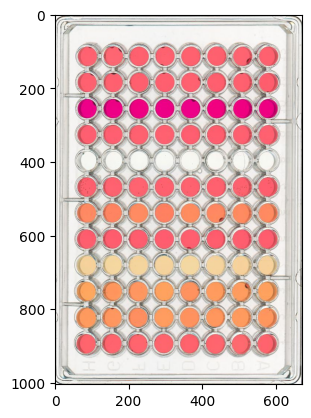

In [19]:
src = cv.imread("wellplate-2.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

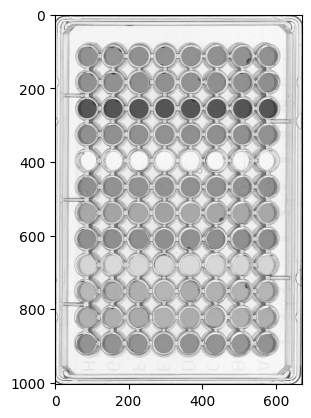

In [20]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
# gray = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
plt.imshow(gray, 'gray')

In [21]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,  # Inverse ratio of the accumulator resolution to the image resolution
                   15, # Minimum distance between the centers of the detected circles
                   param1 = 100, # The higher threshold of the two passed to the Canny edge detector
                   param2 = 40,  # The accumulator threshold for the circle centers at the detection stage
                   minRadius = 0, 
                   maxRadius = 30)

Total pipes:  93


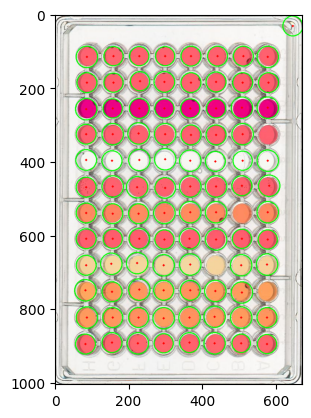

In [22]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)
